<a href="https://colab.research.google.com/github/yyyynwa/DM2025-Lab2-Exercise/blob/main/DM2025-Lab2-Master-Phase_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Colab Environment Setup**

In [1]:
import kagglehub

# Importing our Google News Data
google_news_vectors_path = kagglehub.dataset_download('didiersalazar/google-news-vectors')

print('Data source import complete.')


Using Colab cache for faster access to the 'google-news-vectors' dataset.
Data source import complete.


In [2]:
google_news_vectors_path

'/kaggle/input/google-news-vectors'

In [3]:
# Clone Lab 2's github repository to get all of our material first

!git clone https://github.com/difersalest/DM2025-Lab2-Exercise.git

fatal: destination path 'DM2025-Lab2-Exercise' already exists and is not an empty directory.


In [1]:
# Installing all of our dependencies
# The lab in colab was tested with this, and everything should work as intended
# If in your case something is not working please notify the TAs
!pip3 install python-dotenv==1.1.1 gensim==4.3.3 tensorflow==2.20.0 tensorflow-hub==0.16.1 keras==3.11.3 jupyter==1.1.1 scikit-learn==1.7.1 pandas==2.3.2 numpy==1.26.4 matplotlib==3.10.6 plotly==6.3.0 seaborn==0.13.2 nltk==3.9.1 umap-learn==0.5.9.post2

In [2]:
# test code for environment setup
# import library
import dotenv
import gensim
import tensorflow
import tensorflow_hub
import keras
import jupyter
import sklearn
import pandas
import numpy
import matplotlib
import plotly
import seaborn
import nltk
import umap

%matplotlib inline

print("gensim: " + gensim.__version__)
print("tensorflow: " + tensorflow.__version__)
print("keras: " + keras.__version__)

gensim: 4.3.3
tensorflow: 2.20.0
keras: 3.11.3


:##### **OPTIONAL: If you want to save your outputs you can send them to your own drive by mounting the drive in the following way (uncomment the lines):**

**Table of contents**<a id='toc0_'></a>    
- [Data Mining Lab 2 - Phase 1](#toc1_)    
  - [Summarized Table of Contents](#toc1_1_)    
  - [Before Starting](#toc1_2_)    
  - [Introduction](#toc1_3_)    
  - [**1. Data Preparation**](#toc1_4_)    
  - [**1.1 Load data**](#toc1_5_)    
        - [**>>> Exercise 1 (Take home):**](#toc1_5_1_1_1_)    
    - [**1.2 Save data**](#toc1_5_2_)    
    - [**1.3 Exploratory data analysis (EDA)**](#toc1_5_3_)    
  - [**2. Feature engineering**](#toc1_6_)    
    - [Using Bag of Words](#toc1_6_1_)    
        - [**>>> Exercise 2 (Take home):**](#toc1_6_1_1_1_)    
  - [**3. Model**](#toc1_7_)    
    - [**3.1 Decision Trees**](#toc1_7_1_)    
  - [**4. Results Evaluation**](#toc1_8_)    
        - [**>>> Exercise 3 (Take home):**](#toc1_8_1_1_1_)    
        - [**>>> Exercise 4 (Take home):**](#toc1_8_1_1_2_)    
        - [**>>> Exercise 5 (Take home):**](#toc1_8_1_1_3_)    
  - [**5. Other things you can try**](#toc1_9_)    
  - [**6. Deep Learning**](#toc1_10_)    
    - [**6.1 Prepare data (X, y)**](#toc1_10_1_)    
    - [**6.2 Deal with categorical label (y)**](#toc1_10_2_)    
    - [**6.3 Build model**](#toc1_10_3_)    
    - [**6.4 Train**](#toc1_10_4_)    
    - [**6.5 Predict on testing data**](#toc1_10_5_)    
        - [**>>> Exercise 6 (Take home):**](#toc1_10_5_1_1_)    
    - [Note](#toc1_10_6_)    
    - [More Information for your reference](#toc1_10_7_)    
  - [**7. Word2Vector**](#toc1_11_)    
    - [**7.1 Prepare training corpus**](#toc1_11_1_)    
    - [**7.2 Training our model**](#toc1_11_2_)    
    - [**7.3 Generating word vector (embeddings)**](#toc1_11_3_)    
    - [**7.4 Using a pre-trained w2v model**](#toc1_11_4_)    
      - [(1) Download model by yourself](#toc1_11_4_1_)    
      - [(2) Using gensim api](#toc1_11_4_2_)    
    - [**7.5 king + woman - man = ?**](#toc1_11_5_)    
        - [**>>> Exercise 7 (Take home):**](#toc1_11_5_1_1_)    
  - [**8. Clustering: k-means**](#toc1_12_)    
      - [Basic concept](#toc1_12_1_1_)    
  - [**9. High-dimension Visualization: t-SNE and UMAP**](#toc1_13_)    
    - [**9.1 Prepare visualizing target**](#toc1_13_1_)    
    - [**9.2 Plot using t-SNE and UMAP (2-dimension)**](#toc1_13_2_)    
        - [**>>> Exercise 8 (Take home):**](#toc1_13_2_1_1_)    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

# <a id='toc1_'></a>[Data Mining Lab 2 - Phase 1](#toc0_)
In this lab's phase 1 session we will focus on the use of Neural Word Embeddings

## <a id='toc1_1_'></a>[Summarized Table of Contents](#toc0_)
- **Phase 1:**
1. Data preparation
2. Feature engineering
3. Model
4. Results evaluation
5. Other things you could try
6. Deep Learning
7. Word to Vector
8. Clustering
9. High-dimension Visualization


## <a id='toc1_2_'></a>[Before Starting](#toc0_)

**Make sure you have installed all the required libraries and you have the environment ready to run this lab.**
    

---
## <a id='toc1_3_'></a>[Introduction](#toc0_)

**Dataset:** [SemEval 2017 Task](https://competitions.codalab.org/competitions/16380)

**Task:** Classify text data into 4 different emotions using word embeddings and other deep information retrieval approaches.

![pic0.png](https://drive.google.com/uc?export=view&id=1qurztXdx30Wl2vkCZg7KXXJYJXcE6YR_)

---
## <a id='toc1_4_'></a>[**1. Data Preparation**](#toc0_)

Before beggining the lab, please make sure to download the [Google News Dataset](https://drive.google.com/file/d/0B7XkCwpI5KDYNlNUTTlSS21pQmM/edit) and place it in a folder named "GoogleNews" in the same directory as this file.

---
## <a id='toc1_5_'></a>[**1.1 Load data**](#toc0_)

We start by loading the csv files into a single pandas dataframe for training and one for testing.

In [4]:
import pandas as pd

### training data
anger_train = pd.read_csv("./DM2025-Lab2-Exercise/data/semeval/train/anger-ratings-0to1.train.txt",
                         sep="\t", header=None,names=["id", "text", "emotion", "intensity"])
sadness_train = pd.read_csv("./DM2025-Lab2-Exercise/data/semeval/train/sadness-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
fear_train = pd.read_csv("./DM2025-Lab2-Exercise/data/semeval/train/fear-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
joy_train = pd.read_csv("./DM2025-Lab2-Exercise/data/semeval/train/joy-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])

In [5]:
# combine 4 sub-dataset
train_df = pd.concat([anger_train, fear_train, joy_train, sadness_train], ignore_index=True)

In [6]:
### testing data
anger_test = pd.read_csv("./DM2025-Lab2-Exercise/data/semeval/dev/anger-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
sadness_test = pd.read_csv("./DM2025-Lab2-Exercise/data/semeval/dev/sadness-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
fear_test = pd.read_csv("./DM2025-Lab2-Exercise/data/semeval/dev/fear-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
joy_test = pd.read_csv("./DM2025-Lab2-Exercise/data/semeval/dev/joy-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])

# combine 4 sub-dataset
test_df = pd.concat([anger_test, fear_test, joy_test, sadness_test], ignore_index=True)
train_df.head()

,id,text,emotion,intensity
0,10000,How the fu*k! Who the heck! moved my fridge!.....,anger,0.938
1,10001,So my Indian Uber driver just called someone t...,anger,0.896
2,10002,@DPD_UK I asked for my parcel to be delivered ...,anger,0.896
3,10003,so ef whichever butt wipe pulled the fire alar...,anger,0.896
4,10004,Don't join @BTCare they put the phone down on ...,anger,0.896


In [7]:
# shuffle dataset
train_df = train_df.sample(frac=1)
test_df = test_df.sample(frac=1)

In [8]:
print("Shape of Training df: ", train_df.shape)
print("Shape of Testing df: ", test_df.shape)

Shape of Training df:  (3613, 4)
Shape of Testing df:  (347, 4)


---
##### <a id='toc1_5_1_1_1_'></a>[**>>> Exercise 1 (Take home):**](#toc0_)
Plot word frequency for Top 30 words in both train and test dataset. (Hint: refer to DM lab 1)


In [9]:
# Answer here
import numpy as np
import plotly.express as px
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(train_df.text)

# Top 30 words in training dataset
train_term_frequencies = np.asarray(X_train_counts.sum(axis=0))[0]

train_first_n_terms = 30
train_first_n_indices = np.argsort(train_term_frequencies)[-train_first_n_terms:][::-1]
# Create dataframe for plotting
train_df_use_plotly = pd.DataFrame({"Terms": count_vect.get_feature_names_out()[train_first_n_indices], "Term_Frequencies" :train_term_frequencies[train_first_n_indices]})

train_fig = px.bar(train_df_use_plotly,
             x = "Terms",
             y = "Term_Frequencies",
             title = "Top 30 words in training dataset")

train_fig.update_layout(xaxis_tickangle = -90, width = 2500, height = 600)

train_fig.show()

# Top 30 words in test dataset
X_test_counts = count_vect.transform(test_df.text)

test_term_frequencies = np.asarray(X_test_counts.sum(axis=0))[0]

test_first_n_terms = 30
test_first_n_indices = np.argsort(test_term_frequencies)[-test_first_n_terms:][::-1]
# Create dataframe for plotting
test_df_use_plotly = pd.DataFrame({"Terms": count_vect.get_feature_names_out()[test_first_n_indices], "Term_Frequencies" :test_term_frequencies[test_first_n_indices]})

test_fig = px.bar(test_df_use_plotly,
             x = "Terms",
             y = "Term_Frequencies",
             title = "Top 30 words in test dataset")

test_fig.update_layout(xaxis_tickangle = -90, width = 2500, height = 600)

test_fig.show()

---
### <a id='toc1_5_2_'></a>[**1.2 Save data**](#toc0_)

We will save our data in Pickle format. The pickle module implements binary protocols for serializing and de-serializing a Python object structure.   
  
Some advantages for using pickle structure:  
* Because it stores the attribute type, it's more convenient for cross-platform use.  
* When your data is huge, it could use less space to store also consume less loading time.   

In [10]:
# save to pickle file
train_df.to_pickle("./DM2025-Lab2-Exercise/data/train_df.pkl")
test_df.to_pickle("./DM2025-Lab2-Exercise/data/test_df.pkl")

In [11]:
import pandas as pd

# load a pickle file
train_df = pd.read_pickle("./DM2025-Lab2-Exercise/data/train_df.pkl")
test_df = pd.read_pickle("./DM2025-Lab2-Exercise/data/test_df.pkl")

For more information: https://reurl.cc/0Dzqx

---
### <a id='toc1_5_3_'></a>[**1.3 Exploratory data analysis (EDA)**](#toc0_)

Again, before getting our hands dirty, we need to explore a little bit and understand the data we're dealing with.

In [12]:
# group to find distribution
train_df.groupby(['emotion']).count()['text']

,text
emotion,
anger,857
fear,1147
joy,823
sadness,786


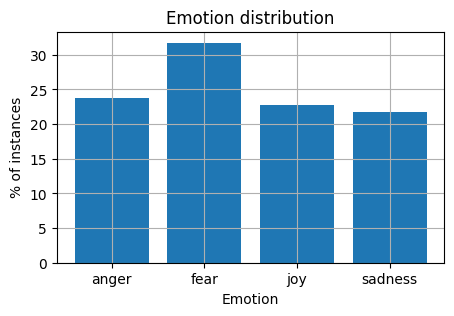

In [13]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

# the histogram of the data
labels = train_df['emotion'].unique()
post_total = len(train_df)
df1 = train_df.groupby(['emotion']).count()['text']
df1 = df1.apply(lambda x: round(x*100/post_total,3))

#plot
fig, ax = plt.subplots(figsize=(5,3))
plt.bar(df1.index,df1.values)

#arrange
plt.ylabel('% of instances')
plt.xlabel('Emotion')
plt.title('Emotion distribution')
plt.grid(True)
plt.show()

---

## <a id='toc1_6_'></a>[**2. Feature engineering**](#toc0_)
### <a id='toc1_6_1_'></a>[Using Bag of Words](#toc0_)
Using scikit-learn ```CountVectorizer``` perform word frequency and use these as features to train a model.  
http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html

In [14]:
from sklearn.feature_extraction.text import CountVectorizer

In [15]:
# build analyzers (bag-of-words)
BOW_vectorizer = CountVectorizer()

In [16]:
# 1. Learn a vocabulary dictionary of all tokens in the raw documents.
BOW_vectorizer.fit(train_df['text'])

# 2. Transform documents to document-term matrix.
train_data_BOW_features = BOW_vectorizer.transform(train_df['text'])
test_data_BOW_features = BOW_vectorizer.transform(test_df['text'])

In [17]:
# check the result
train_data_BOW_features

<3613x10115 sparse matrix of type '<class 'numpy.int64'>'
	with 51467 stored elements in Compressed Sparse Row format>

In [18]:
type(train_data_BOW_features)

scipy.sparse._csr.csr_matrix

In [19]:
# add .toarray() to show
train_data_BOW_features.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [20]:
# check the dimension
train_data_BOW_features.shape

(3613, 10115)

In [21]:
# observe some feature names
feature_names = BOW_vectorizer.get_feature_names_out()
feature_names[100:110]

array(['2k17', '2much', '2nd', '30', '300', '301', '30am', '30pm', '30s',
       '31'], dtype=object)

The embedding is done. We can technically feed this into our model. However, depending on the embedding technique you use and your model, your accuracy might not be as high, because:

* curse of dimensionality  (we have 10,115 dimension now)
* some important features are ignored (for example, some models using emoticons yeld better performance than counterparts)

In [22]:
"😂" in feature_names

False

Let's try using another tokenizer below.

In [23]:
import nltk
nltk.download('punkt_tab')
# build analyzers (bag-of-words)
BOW_500 = CountVectorizer(max_features=500, tokenizer=nltk.word_tokenize)

# apply analyzer to training data
BOW_500.fit(train_df['text'])

train_data_BOW_features_500 = BOW_500.transform(train_df['text'])

## check dimension
train_data_BOW_features_500.shape

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
/usr/local/lib/python3.12/dist-packages/sklearn/feature_extraction/text.py:517: UserWarning:

The parameter 'token_pattern' will not be used since 'tokenizer' is not None'



(3613, 500)

In [24]:
train_data_BOW_features_500.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [3, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 9, 0, ..., 0, 0, 0],
       [3, 5, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [25]:
# observe some feature names
feature_names_500 = BOW_500.get_feature_names_out()
feature_names_500[100:110]

array(['change', 'cheer', 'cheerful', 'cheering', 'cheery', 'come',
       'comes', 'could', 'country', 'cry'], dtype=object)

In [26]:
"😂" in feature_names_500

True

---
##### <a id='toc1_6_1_1_1_'></a>[**>>> Exercise 2 (Take home):**](#toc0_)
Generate an embedding using the TF-IDF vectorizer instead of th BOW one with 1000 features and show the feature names for features [100:110].

In [27]:
# Answer here
from sklearn.feature_extraction.text import TfidfVectorizer

# TF-IDF vectorizer with 1000 features
TFIDF_1000 = TfidfVectorizer(max_features=1000, tokenizer=nltk.word_tokenize)

TFIDF_1000.fit(train_df['text'])

train_data_TFIDF_features_1000 = TFIDF_1000.transform(train_df['text'])

print("Shape:", train_data_TFIDF_features_1000.shape)

# [100:110] feature names
feature_names_1000 = TFIDF_1000.get_feature_names_out()

print("Feature names [100:110]:", feature_names_1000[100:110])

Shape: (3613, 1000)
Feature names [100:110]: ['attacks' 'awareness' 'away' 'awe' 'awesome' 'awful' 'b' 'baby' 'back'
 'bad']


---
## <a id='toc1_7_'></a>[**3. Model**](#toc0_)
### <a id='toc1_7_1_'></a>[**3.1 Decision Trees**](#toc0_)
Using scikit-learn ```DecisionTreeClassifier``` performs word frequency and uses these as features to train a model.  
http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier

In [28]:
from sklearn.tree import DecisionTreeClassifier

# for a classificaiton problem, you need to provide both training & testing data
X_train = BOW_500.transform(train_df['text'])
y_train = train_df['emotion']

X_test = BOW_500.transform(test_df['text'])
y_test = test_df['emotion']

## take a look at data dimension is a good habit  :)
print('X_train.shape: ', X_train.shape)
print('y_train.shape: ', y_train.shape)
print('X_test.shape: ', X_test.shape)
print('y_test.shape: ', y_test.shape)

X_train.shape:  (3613, 500)
y_train.shape:  (3613,)
X_test.shape:  (347, 500)
y_test.shape:  (347,)


In [29]:
## build DecisionTree model
DT_model = DecisionTreeClassifier(random_state=1)

## training!
DT_model = DT_model.fit(X_train, y_train)

## predict!
y_train_pred = DT_model.predict(X_train)
y_test_pred = DT_model.predict(X_test)

## so we get the pred result
y_test_pred[:10]

array(['sadness', 'sadness', 'fear', 'fear', 'sadness', 'anger', 'fear',
       'fear', 'sadness', 'anger'], dtype=object)

---
## <a id='toc1_8_'></a>[**4. Results Evaluation**](#toc0_)

Now we will check the results of our model's performance

In [30]:
## accuracy
from sklearn.metrics import accuracy_score

acc_train = accuracy_score(y_true=y_train, y_pred=y_train_pred)
acc_test = accuracy_score(y_true=y_test, y_pred=y_test_pred)

print('training accuracy: {}'.format(round(acc_train, 2)))
print('testing accuracy: {}'.format(round(acc_test, 2)))


training accuracy: 0.99
testing accuracy: 0.66


In [31]:
## precision, recall, f1-score,
from sklearn.metrics import classification_report

print(classification_report(y_true=y_test, y_pred=y_test_pred))

              precision    recall  f1-score   support

       anger       0.62      0.71      0.67        84
        fear       0.67      0.63      0.65       110
         joy       0.74      0.67      0.70        79
     sadness       0.62      0.64      0.63        74

    accuracy                           0.66       347
   macro avg       0.66      0.66      0.66       347
weighted avg       0.66      0.66      0.66       347



In [32]:
## check by confusion matrix
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_true=y_test, y_pred=y_test_pred)
print(cm)

[[60 11  7  6]
 [20 69  7 14]
 [ 6 11 53  9]
 [10 12  5 47]]


In [33]:
# Funciton for visualizing confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import itertools

def plot_confusion_matrix(cm, classes, title='Confusion matrix',
                          cmap=sns.cubehelix_palette(as_cmap=True)):
    """
    This function is modified from:
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    """
    classes.sort()
    tick_marks = np.arange(len(classes))

    fig, ax = plt.subplots(figsize=(5,5))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           xticklabels = classes,
           yticklabels = classes,
           title = title,
           xlabel = 'Predicted label',
           ylabel = 'True label')

    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")
    ylim_top = len(classes) - 0.5
    plt.ylim([ylim_top, -.5])
    plt.tight_layout()
    plt.show()

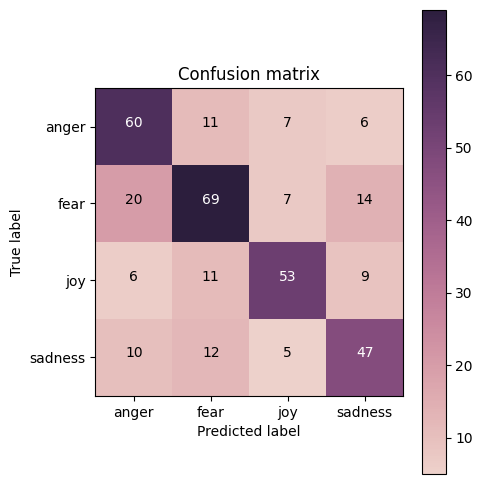

In [34]:
# plot your confusion matrix
my_tags = ['anger', 'fear', 'joy', 'sadness']
plot_confusion_matrix(cm, classes=my_tags, title='Confusion matrix')

---
##### <a id='toc1_8_1_1_1_'></a>[**>>> Exercise 3 (Take home):**](#toc0_)
Can you interpret the results above? What do they mean?

In [35]:
# Answer here
print("""

Interpretation of the confusion matrix:

1. It shows the model's predictions versus the true labels
    e.g., predicted anger vs. true anger/ true fear/ true joy/ true sadness
2. The diagonal elements represent correct predictions (true positive for each labels)
3. Others represent incorrect predictions (false positive for each labels)

So, observing this results we can conclude that:

1. "Anger" and "fear" are frequently confused, with 16 of the predicted anger misidentified as fear
2. "Sadness" and "anger" are distinguished much better than others
3. The model performs differently across each label (each emotion)

""")



Interpretation of the confusion matrix:

1. It shows the model's predictions versus the true labels
    e.g., predicted anger vs. true anger/ true fear/ true joy/ true sadness
2. The diagonal elements represent correct predictions (true positive for each labels)
3. Others represent incorrect predictions (false positive for each labels)

So, observing this results we can conclude that:

1. "Anger" and "fear" are frequently confused, with 16 of the predicted anger misidentified as fear
2. "Sadness" and "anger" are distinguished much better than others
3. The model performs differently across each label (each emotion)




---
##### <a id='toc1_8_1_1_2_'></a>[**>>> Exercise 4 (Take home):**](#toc0_)
Build a model using a ```Naive Bayes``` model and train it. What are the testing results?

*Reference*: https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html

Naive Bayes Training Accuracy: 0.99
Naive Bayes Testing Accuracy: 0.71

Classification Report:
              precision    recall  f1-score   support

       anger       0.65      0.67      0.66        84
        fear       0.74      0.81      0.77       110
         joy       0.77      0.70      0.73        79
     sadness       0.66      0.62      0.64        74

    accuracy                           0.71       347
   macro avg       0.71      0.70      0.70       347
weighted avg       0.71      0.71      0.71       347


Confusion Matrix:
[[56 14  5  9]
 [ 7 89  5  9]
 [11  7 55  6]
 [12 10  6 46]]


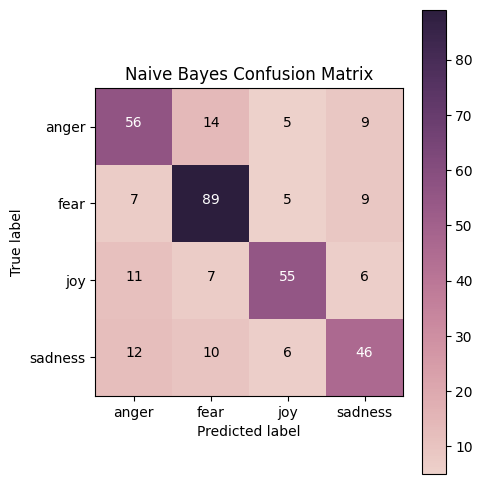

In [36]:
# Answer here
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

X_train = BOW_500.transform(train_df['text'])
y_train = train_df['emotion']

X_test = BOW_500.transform(test_df['text'])
y_test = test_df['emotion']

nb_model = MultinomialNB()

# Training
nb_model = nb_model.fit(X_train, y_train)

# Predicting
y_train_pred_nb = nb_model.predict(X_train)
y_test_pred_nb = nb_model.predict(X_test)

# Calculate accuracy
nb_acc_train = accuracy_score(y_true=y_train, y_pred=y_train_pred)
nb_acc_test = accuracy_score(y_test, y_test_pred_nb)
print('Naive Bayes Training Accuracy: {}'.format(round(nb_acc_train, 2)))
print('Naive Bayes Testing Accuracy: {}'.format(round(nb_acc_test, 2)))

print('\nClassification Report:')
print(classification_report(y_test, y_test_pred_nb))

cm_nb = confusion_matrix(y_true=y_test, y_pred=y_test_pred_nb)
print('\nConfusion Matrix:')
print(cm_nb)

# Plot confusion matrix
plot_confusion_matrix(cm_nb, classes=my_tags, title='Naive Bayes Confusion Matrix')

---
##### <a id='toc1_8_1_1_3_'></a>[**>>> Exercise 5 (Take home):**](#toc0_)

How do the results from the Naive Bayes model and the Decision Tree model compare? How do you interpret these differences? Use the theoretical background covered in class to try and explain these differences.

|                             |       |      |     |         |              |
|-----------------------------|-------|------|-----|---------|--------------|
| **DecisionTree**            |       |      |     |         |              |
| **training accuracy: 0.99** |       |      |     |         |              |
| **testing accuracy: 0.68**  |       |      |     |         |              |
| **True\Predicted**          | Anger | Fear | Joy | Sadness | ACC          |
| **Anger**                   | 57    | 18   | 6   | 3       | 57/84≈67.9%  |
| **Fear**                    | 16    | 76   | 9   | 9       | 76/110≈69.1% |
| **Joy**                     | 6     | 9    | 56  | 8       | 56/79≈70.9%  |
| **Sadness**                 | 7     | 13   | 7   | 47      | 47/74≈63.5%  |
| **Naive Bayes**             |       |      |     |         |              |
| **training accuracy: 0.99** |       |      |     |         |              |
| **testing accuracy: 0.7**   |       |      |     |         |              |
| **True\Predicted**          | Anger | Fear | Joy | Sadness | ACC          |
| **Anger**                   | 55    | 15   | 5   | 9       | 55/84≈65.5%  |
| **Fear**                    | 9     | 85   | 5   | 11      | 85/110≈77.3% |
| **Joy**                     | 11    | 6    | 56  | 6       | 56/79≈70.9%  |
| **Sadness**                 | 12    | 10   | 6   | 46      | 46/74≈62.2%  |


In [37]:
# Answer here
print(
"""
Comparison between Naive Bayes and Decision Tree models:

1. Decision Tree is slightly better at predicting "Joy" (56/79≈70.9% acc)
2. Naive Bayes good at detecting "Fear" (85/110≈77.3% acc)
3. Both models have the same accuracy at "Joy" (56/79≈70.9% acc) and struggle most with "Sadness" (~63%)
4. Both models achieved a very high training accuracy of 0.99
   but the testing accuracies are so much lower

Theoretical Explanation:


The drop between training and test accuracy indicates that both models, are likely overfitting.
So, here is the posible explanations:
    1. Decision Tree when "unconstrained" (not pruned or limited),
       can create complex structures that essentially memorize the training examples rather than learning patterns from them.
    2. Naive Bayes its "naive" assumption is often broken in reality data,
       which causes an effect on the noise of datasets and leads to a drop in test accuracy.

Overall, Naive Bayes model shows a little improvement over Decision Tree model.
This may suggest that the simplifying assumption is not severely affected in this dataset.

"""
)


Comparison between Naive Bayes and Decision Tree models:

1. Decision Tree is slightly better at predicting "Joy" (56/79≈70.9% acc)
2. Naive Bayes good at detecting "Fear" (85/110≈77.3% acc)
3. Both models have the same accuracy at "Joy" (56/79≈70.9% acc) and struggle most with "Sadness" (~63%)
4. Both models achieved a very high training accuracy of 0.99
   but the testing accuracies are so much lower

Theoretical Explanation:


The drop between training and test accuracy indicates that both models, are likely overfitting.
So, here is the posible explanations:
    1. Decision Tree when "unconstrained" (not pruned or limited), 
       can create complex structures that essentially memorize the training examples rather than learning patterns from them.
    2. Naive Bayes its "naive" assumption is often broken in reality data, 
       which causes an effect on the noise of datasets and leads to a drop in test accuracy.

Overall, Naive Bayes model shows a little improvement over Decision

---

## <a id='toc1_9_'></a>[**5. Other things you can try**](#toc0_)

Thus, there are several things you can try that will affect your results. In order to yield better results, you can experiment by:
- Trying different features (Feature engineering)e.g Word2Vec, PCA, LDA, FastText, Clustering
- Trying different models
- Analyzing your results and interpret them to improve your feature engineering/model building process
- Iterate through the steps above until finding a satisfying result

Remember that you should also consider the task at hand and the model you'll feed the data to.

---
## <a id='toc1_10_'></a>[**6. Deep Learning**](#toc0_)

We use [Keras](https://keras.io/) to be our deep learning framework, and follow the [Model (functional API)](https://keras.io/models/model/) to build a Deep Neural Network (DNN) model. Keras runs with Tensorflow in the backend. It's a nice abstraction to start working with NN models.

Because Deep Learning is a 1-semester course, we can't talk about each detail about it in the lab session. Here, we only provide a simple template about how to build & run a DL model successfully. You can follow this template to design your model.

We will begin by building a fully connected network, which looks like this:

![pic1.png](https://drive.google.com/uc?export=view&id=1DKd43x7RNHTa2gn_HUV2SRNJ7MhV0dKh)

(source: https://github.com/drewnoff/spark-notebook-ml-labs/tree/master/labs/DLFramework)


---
### <a id='toc1_10_1_'></a>[**6.1 Prepare data (X, y)**](#toc0_)

In [38]:
import keras

# standardize name (X, y)
X_train = BOW_500.transform(train_df['text'])
y_train = train_df['emotion']

X_test = BOW_500.transform(test_df['text'])
y_test = test_df['emotion']

## check dimension is a good habbit
print('X_train.shape: ', X_train.shape)
print('y_train.shape: ', y_train.shape)
print('X_test.shape: ', X_test.shape)
print('y_test.shape: ', y_test.shape)

X_train.shape:  (3613, 500)
y_train.shape:  (3613,)
X_test.shape:  (347, 500)
y_test.shape:  (347,)


In [39]:
import keras

In [40]:
BOW_500.transform(test_df['text'])

<347x500 sparse matrix of type '<class 'numpy.int64'>'
	with 4103 stored elements in Compressed Sparse Row format>

---
### <a id='toc1_10_2_'></a>[**6.2 Deal with categorical label (y)**](#toc0_)

Rather than put your label `train_df['emotion']` directly into a model, we have to process these categorical (or say nominal) label by ourselves.

Here, we use the basic method [one-hot encoding](https://en.wikipedia.org/wiki/One-hot) to transform our categorical  labels to numerical ones.


In [41]:
# deal with label (string -> one-hot)
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
label_encoder.fit(y_train)

print('check label: ', label_encoder.classes_)
print('\n## Before convert')
print('y_train[0:4]:\n', y_train[0:4])
print('\ny_train.shape: ', y_train.shape)
print('y_test.shape: ', y_test.shape)

def label_encode(le, labels):
    enc = le.transform(labels)
    return keras.utils.to_categorical(enc)

def label_decode(le, one_hot_label):
    dec = np.argmax(one_hot_label, axis=1)
    return le.inverse_transform(dec)

check label:  ['anger' 'fear' 'joy' 'sadness']

## Before convert
y_train[0:4]:
 3569    sadness
2096        joy
504       anger
2601        joy
Name: emotion, dtype: object

y_train.shape:  (3613,)
y_test.shape:  (347,)


In [42]:
y_train = label_encode(label_encoder, y_train)
y_test = label_encode(label_encoder, y_test)

print('\n\n## After convert')
print('y_train[0:4]:\n', y_train[0:4])
print('\ny_train.shape: ', y_train.shape)
print('y_test.shape: ', y_test.shape)




## After convert
y_train[0:4]:
 [[0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [0. 0. 1. 0.]]

y_train.shape:  (3613, 4)
y_test.shape:  (347, 4)


---
### <a id='toc1_10_3_'></a>[**6.3 Build model**](#toc0_)

In [43]:
# I/O check
input_shape = X_train.shape[1]
print('input_shape: ', input_shape)

output_shape = len(label_encoder.classes_)
print('output_shape: ', output_shape)

input_shape:  500
output_shape:  4


![pic2.png](https://drive.google.com/uc?export=view&id=1F_RmXNBo3uUPyopFmYne61s-H4ecl-iz)

In [44]:
from keras.models import Model
from keras.layers import Input, Dense
from keras.layers import ReLU, Softmax

# input layer
model_input = Input(shape=(input_shape, ))  # 500
X = model_input

# 1st hidden layer
X_W1 = Dense(units=64)(X)  # 64
H1 = ReLU()(X_W1)

# 2nd hidden layer
H1_W2 = Dense(units=64)(H1)  # 64
H2 = ReLU()(H1_W2)

# output layer
H2_W3 = Dense(units=output_shape)(H2)  # 4
H3 = Softmax()(H2_W3)

model_output = H3

# create model
model = Model(inputs=[model_input], outputs=[model_output])

# loss function & optimizer
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# show model construction
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 500)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        32,064 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu (ReLU)                    │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_1 (ReLU)                  │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 4)              │           260 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ softmax (Softmax)               │ (None, 4)              │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 36,484 (142.52 KB)

 Trainable params: 36,484 (142.52 KB)

 Non-trainable params: 0 (0.00 B)

---
### <a id='toc1_10_4_'></a>[**6.4 Train**](#toc0_)

In [45]:
from keras.callbacks import CSVLogger

csv_logger = CSVLogger('./DM2025-Lab2-Exercise/logs/training_log.csv')

# training setting
epochs = 25
batch_size = 32

# training!
history = model.fit(X_train, y_train,
                    epochs=epochs,
                    batch_size=batch_size,
                    callbacks=[csv_logger],
                    validation_data = (X_test, y_test))
print('training finish')

Epoch 1/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 50s 431ms/step - accuracy: 0.3518 - loss: 1.3377 - val_accuracy: 0.4265 - val_loss: 1.2862
Epoch 2/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 19s 164ms/step - accuracy: 0.6407 - loss: 1.0004 - val_accuracy: 0.6686 - val_loss: 0.9181
Epoch 3/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 6s 53ms/step - accuracy: 0.8027 - loss: 0.5792 - val_accuracy: 0.7089 - val_loss: 0.7718
Epoch 4/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 5s 42ms/step - accuracy: 0.8458 - loss: 0.4208 - val_accuracy: 0.7176 - val_loss: 0.8007
Epoch 5/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 6s 53ms/step - accuracy: 0.8871 - loss: 0.3231 - val_accuracy: 0.7032 - val_loss: 0.7922
Epoch 6/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - accuracy: 0.9089 - loss: 0.2596 - val_accuracy: 0.7147 - val_loss: 0.8629
Epoch 7/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - accuracy: 0.9303 - loss: 0.2123 - val_accuracy: 0.7032 - val_loss: 0.8960
Epoch 8/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - accuracy: 0.9455 - loss: 0.1782 - val_

---
### <a id='toc1_10_5_'></a>[**6.5 Predict on testing data**](#toc0_)

In [46]:
## predict
pred_result = model.predict(X_test, batch_size=128)
pred_result[:5]

3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 247ms/step


array([[3.7731205e-03, 1.0642930e-05, 2.6956265e-04, 9.9594671e-01],
       [3.6026812e-01, 2.9089263e-01, 6.9170445e-04, 3.4814760e-01],
       [1.8750821e-06, 9.9905926e-01, 2.4471685e-04, 6.9413363e-04],
       [6.4539427e-06, 9.9943525e-01, 5.4864690e-04, 9.6901967e-06],
       [8.5128238e-03, 4.2170921e-04, 3.8483041e-08, 9.9106550e-01]],
      dtype=float32)

In [47]:
pred_result = label_decode(label_encoder, pred_result)
pred_result[:5]

array(['sadness', 'anger', 'fear', 'fear', 'sadness'], dtype=object)

In [48]:
from sklearn.metrics import accuracy_score

print('testing accuracy: {}'.format(round(accuracy_score(label_decode(label_encoder, y_test), pred_result), 2)))

testing accuracy: 0.68


In [49]:
#Let's take a look at the training log
training_log = pd.DataFrame()
training_log = pd.read_csv("./DM2025-Lab2-Exercise/logs/training_log.csv")
training_log

,epoch,accuracy,loss,val_accuracy,val_loss
0,0,0.351785,1.337746,0.426513,1.286239
1,1,0.640742,1.000372,0.668588,0.918114
2,2,0.802657,0.579205,0.708934,0.771814
3,3,0.845834,0.420812,0.717579,0.800720
4,4,0.887074,0.323093,0.703170,0.792233
5,5,0.908940,0.259566,0.714697,0.862906
6,6,0.930252,0.212316,0.703170,0.895993
7,7,0.945475,0.178248,0.685879,1.010113
8,8,0.956823,0.152298,0.691643,1.046049
9,9,0.962635,0.133974,0.691643,1.126720


---
##### <a id='toc1_10_5_1_1_'></a>[**>>> Exercise 6 (Take home):**](#toc0_)

Plot the Training and Validation Accuracy and Loss (different plots), just like the images below.(Note: the pictures below are an example from a different model). How to interpret the graphs you got? How are they related to the concept of overfitting/underfitting covered in class?

![pic3.png](https://drive.google.com/uc?export=view&id=1cYxbZ-72ZJucyUdOsRUEodH203ldZScM)  ![pic4.png](https://drive.google.com/uc?export=view&id=1LybXXqULWkB7IGO3X5g8rLYFx7lhSoms)


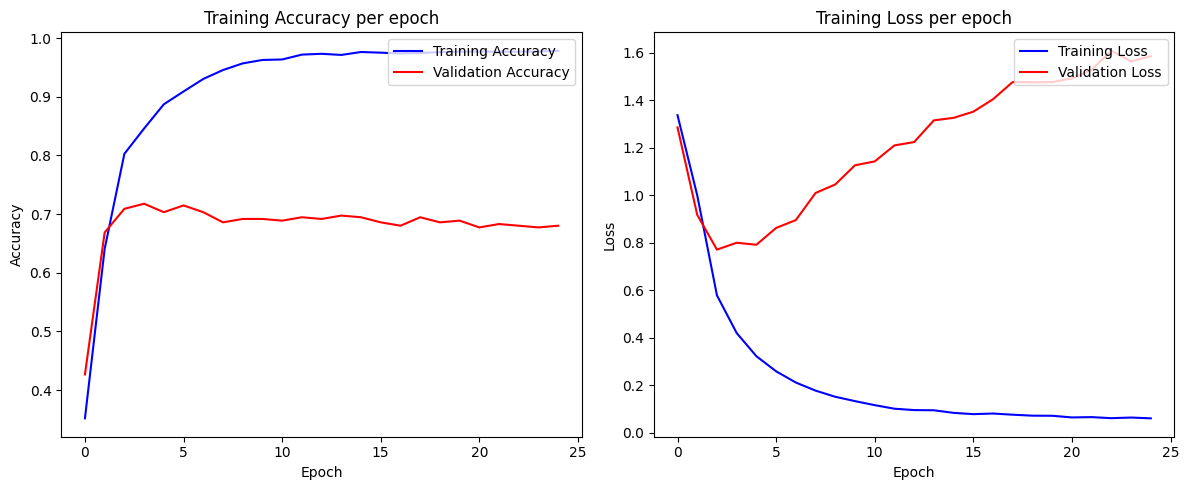


How to interpret the graphs you got? 

Training accuracy line increases rapidly in the beginning of the training process, and eventually remains high and flat.
Validation accuracy increases rapidly along with training accuracy at first, but it keeps staging after about 5 epoch.
Training loss line decreases rapidly in the begining of the training process, and eventually remains low and flat.
Validation loss line decreases rapidly along with training loss line at first, but it continuously increases in the rest of training process.

How are they related to the concept of overfitting/underfitting covered in class?

The relationship between the training and validation curves is an indicator of overfitting, which means the model is "memorizing" the training samples rather than underlying the patterns that apply to validation.
From the evidence of the large gap in training and validation accuracy, the increasing gap is a sign of overfitting.
On the other side, the divergence in the training

In [50]:
# Answer here
import matplotlib.pyplot as plt

# Plot Training and Validation Accuracy
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(training_log['epoch'], training_log['accuracy'], 'b-', label='Training Accuracy')
plt.plot(training_log['epoch'], training_log['val_accuracy'], 'r-', label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training Accuracy per epoch')
plt.legend(loc='upper right')
plt.grid(False)

# Plot Training and Validation Loss
plt.subplot(1, 2, 2)
plt.plot(training_log['epoch'], training_log['loss'], 'b-', label='Training Loss')
plt.plot(training_log['epoch'], training_log['val_loss'], 'r-', label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss per epoch')
plt.legend(loc='upper right')
plt.grid(False)

plt.tight_layout()
plt.show()

print("""
How to interpret the graphs you got?

Training accuracy line increases rapidly in the beginning of the training process, and eventually remains high and flat.
Validation accuracy increases rapidly along with training accuracy at first, but it keeps staging after about 5 epoch.
Training loss line decreases rapidly in the begining of the training process, and eventually remains low and flat.
Validation loss line decreases rapidly along with training loss line at first, but it continuously increases in the rest of training process.

How are they related to the concept of overfitting/underfitting covered in class?

The relationship between the training and validation curves is an indicator of overfitting, which means the model is "memorizing" the training samples rather than underlying the patterns that apply to validation.
From the evidence of the large gap in training and validation accuracy, the increasing gap is a sign of overfitting.
On the other side, the divergence in the training and validation loss, where the model can optimize training loss but regrades validation loss as another indication of overfitting.
""")

---

### <a id='toc1_10_6_'></a>[Note](#toc0_)

If you don't have a GPU (level is higher than GTX 1060) or you are not good at setting lots of things about computer, we recommend you to use the [kaggle kernel](https://www.kaggle.com/kernels) to do deep learning model training. They have already installed all the librarys and provided free GPU for you to use.

Note however that you will only be able to run a kernel for 6 hours. After 6 hours of inactivity, your Kaggle kernel will shut down (meaning if your model takes more than 6 hours to train, you can't train it at once).


### <a id='toc1_10_7_'></a>[More Information for your reference](#toc0_)

* Keras document: https://keras.io/
* Keras GitHub example: https://github.com/keras-team/keras/tree/master/examples
* CS229: Machine Learning: http://cs229.stanford.edu/syllabus.html
* Deep Learning cheatsheet: https://stanford.edu/~shervine/teaching/cs-229/cheatsheet-deep-learning
* If you want to try TensorFlow or PyTorch: https://pytorch.org/tutorials/
https://www.tensorflow.org/tutorials/quickstart/beginner

---
## <a id='toc1_11_'></a>[**7. Word2Vector**](#toc0_)

We will introduce how to use `gensim` to train your word2vec model and how to load a pre-trained model.

https://radimrehurek.com/gensim/index.html

---
### <a id='toc1_11_1_'></a>[**7.1 Prepare training corpus**](#toc0_)

In [51]:
## check library
import gensim

## ignore warnings
import warnings
warnings.filterwarnings('ignore')

# # if you want to see the training messages, you can use it
# import logging
# logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

## the input type
train_df['text_tokenized'] = train_df['text'].apply(lambda x: nltk.word_tokenize(x))
train_df[['id', 'text', 'text_tokenized']].head()

,id,text,text_tokenized
3569,40742,@Hails_Berry8 @sajedhariri23 varsity pine riding,"[@, Hails_Berry8, @, sajedhariri23, varsity, p..."
2096,30092,@yoshi_lucky Good morning.Let's start with a s...,"[@, yoshi_lucky, Good, morning.Let, 's, start,..."
504,10504,Checked-in for my flight to Toronto. Took seat...,"[Checked-in, for, my, flight, to, Toronto, ., ..."
2601,30597,•Days!'\nHe was itching for a fight..itching f...,"[•Days, !, '\nHe, was, itching, for, a, fight,..."
3509,40682,it didn't impress me but it didn't depress me',"[it, did, n't, impress, me, but, it, did, n't,..."


In [52]:
## create the training corpus
training_corpus = train_df['text_tokenized'].values
training_corpus[:3]

array([list(['@', 'Hails_Berry8', '@', 'sajedhariri23', 'varsity', 'pine', 'riding']),
       list(['@', 'yoshi_lucky', 'Good', 'morning.Let', "'s", 'start', 'with', 'a', 'smile', '!', '\\nLet', "'s", 'enjoy', 'life', 'in', 'a', 'cheerful', 'way', '!', '\\nDo', "n't", 'worry', 'be', 'happy', '!']),
       list(['Checked-in', 'for', 'my', 'flight', 'to', 'Toronto', '.', 'Took', 'seat', '3D', 'just', 'to', 'infuriate', '@', 'perpetualgeek', '.'])],
      dtype=object)

---
### <a id='toc1_11_2_'></a>[**7.2 Training our model**](#toc0_)

You can try to train your own model. More details: https://radimrehurek.com/gensim/models/word2vec.html

In [53]:
from gensim.models import Word2Vec

## setting
vector_dim = 100
window_size = 5
min_count = 1
training_epochs = 20

## model
word2vec_model = Word2Vec(sentences=training_corpus,
                          vector_size=vector_dim, window=window_size,
                          min_count=min_count, epochs=training_epochs)

![Imgur](https://i.imgur.com/Fca3MCs.png)

---
### <a id='toc1_11_3_'></a>[**7.3 Generating word vector (embeddings)**](#toc0_)

In [54]:
# get the corresponding vector of a word
word_vec = word2vec_model.wv['happy']
word_vec

array([ 0.4561145 ,  0.4964428 ,  0.00471429,  0.07245023, -0.44328374,
       -1.0551103 ,  0.65503764,  1.0144271 , -0.44501972, -0.7567541 ,
       -0.2319998 , -0.64816654, -0.52947116,  0.6882651 , -0.25376323,
       -0.3687249 ,  0.27781624, -0.39060283,  0.26769605, -0.9601191 ,
        0.86086005,  1.0407453 ,  0.43453887,  0.06554747,  0.5550527 ,
        0.43579122, -0.7948111 ,  0.42586148, -0.41298527,  0.20444202,
        0.35089037, -0.23434187,  0.29116547, -0.69731486, -0.03249821,
        0.49980944,  0.25279236, -0.06376066, -0.2790048 , -0.35742736,
       -0.16404787, -0.16373973, -0.74841416,  0.18892662,  0.48018923,
       -0.0708233 , -1.1094433 ,  0.20323555,  0.04046451,  0.6452189 ,
        0.02278837, -0.45174623, -0.00529303, -0.12526189, -0.47626224,
       -0.41041678,  0.5863973 , -0.05380759, -0.19544233,  0.6225331 ,
       -0.12434594, -0.35964185,  0.61261946,  0.30540857, -0.5871694 ,
        0.7111142 , -0.08549146,  0.7194693 , -1.2049783 ,  0.74

In [55]:
# Get the most similar words
word = 'happy'
topn = 10
word2vec_model.wv.most_similar(word, topn=topn)

[('Makes', 0.9259365797042847),
 ('birthday', 0.9235019683837891),
 ('Be', 0.9131770730018616),
 ('help', 0.9127379059791565),
 ('bday', 0.9126882553100586),
 ('smile', 0.9064639806747437),
 ('cats', 0.9039497971534729),
 ('free', 0.90218585729599),
 ('vigilant', 0.8974911570549011),
 ("'you", 0.8958436250686646)]

---
### <a id='toc1_11_4_'></a>[**7.4 Using a pre-trained w2v model**](#toc0_)

Instead of training your own model ,you can use a model that has already been trained. Here, we see 2 ways of doing that:


#### <a id='toc1_11_4_1_'></a>[(1) Download model by yourself](#toc0_)

source: [GoogleNews-vectors-negative300](https://code.google.com/archive/p/word2vec/)

more details: https://radimrehurek.com/gensim/models/keyedvectors.html

In [56]:
from gensim.models import KeyedVectors

## Note: this model is huge, this will take some time ...
model_path = f"{google_news_vectors_path}/GoogleNews-vectors-negative300.bin"
w2v_google_model = KeyedVectors.load_word2vec_format(model_path, binary=True)
print('load ok')

w2v_google_model.most_similar('happy', topn=10)

load ok


[('glad', 0.7408890724182129),
 ('pleased', 0.6632170677185059),
 ('ecstatic', 0.6626912355422974),
 ('overjoyed', 0.6599286794662476),
 ('thrilled', 0.6514049172401428),
 ('satisfied', 0.6437949538230896),
 ('proud', 0.636042058467865),
 ('delighted', 0.627237856388092),
 ('disappointed', 0.6269949674606323),
 ('excited', 0.6247665286064148)]

#### <a id='toc1_11_4_2_'></a>[(2) Using gensim api](#toc0_)

Other pretrained models are available here: https://github.com/RaRe-Technologies/gensim-data

In [57]:
import gensim.downloader as api

## If you see `SSL: CERTIFICATE_VERIFY_FAILED` error, use this:
import ssl
import urllib.request
ssl._create_default_https_context = ssl._create_unverified_context

glove_twitter_25_model = api.load("glove-twitter-25")
print('load ok')

glove_twitter_25_model.most_similar('happy', topn=10)

[==================================================] 100.0% 104.8/104.8MB downloaded
load ok


[('birthday', 0.9577818512916565),
 ('thank', 0.937666654586792),
 ('welcome', 0.93361496925354),
 ('love', 0.9176183342933655),
 ('miss', 0.9164500832557678),
 ('hello', 0.9158351421356201),
 ('thanks', 0.915008544921875),
 ('merry', 0.9053249359130859),
 ('bless', 0.902732253074646),
 ('wish', 0.9013164043426514)]

---
### <a id='toc1_11_5_'></a>[**7.5 king + woman - man = ?**](#toc0_)

Let's run one of the most famous examples for Word2Vec and compute the similarity between these 3 words:

In [58]:
w2v_google_model.most_similar(positive=['king', 'woman'], negative=['man'])

[('queen', 0.7118193507194519),
 ('monarch', 0.6189674139022827),
 ('princess', 0.5902431011199951),
 ('crown_prince', 0.5499460697174072),
 ('prince', 0.5377321839332581),
 ('kings', 0.5236844420433044),
 ('Queen_Consort', 0.5235945582389832),
 ('queens', 0.5181134343147278),
 ('sultan', 0.5098593831062317),
 ('monarchy', 0.5087411999702454)]

---
##### <a id='toc1_11_5_1_1_'></a>[**>>> Exercise 7 (Take home):**](#toc0_)

Now, we have the word vectors, but our input data is a sequence of words (or say sentence).
How can we utilize these "word" vectors to represent the sentence data and train our model?


In [59]:
# Answer here
print("""

How to utilize these "word" vectors to represent the sentence data and train the model?

1. Directly concatenate word vectors that considering words order and position but leading to a very high-dimensional vector.
2. Generally calculate the average(mean) of all the word vectors in the sentence, which is a simply representing method but ignoring the individual importance of words.
3. Weighting words by given importance score (computing frequency) foucus on the useful part of data.

""")



How to utilize these "word" vectors to represent the sentence data and train the model?

1. Directly concatenate word vectors that considering words order and position but leading to a very high-dimensional vector.
2. Generally calculate the average(mean) of all the word vectors in the sentence, which is a simply representing method but ignoring the individual importance of words.
3. Weighting words by given importance score (computing frequency) foucus on the useful part of data.




---
## <a id='toc1_12_'></a>[**8. Clustering: k-means**](#toc0_)

Here we introduce how to use `sklearn` to do the basic **unsupervised learning** approach, k-means.    

more details: http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html


#### <a id='toc1_12_1_1_'></a>[Basic concept](#toc0_)

![pic5.png](https://drive.google.com/uc?export=view&id=1YaPsXWrr7sQFHelMyiNuERs2lG1tZZ54)

(img source: https://towardsdatascience.com/k-means-clustering-identifying-f-r-i-e-n-d-s-in-the-world-of-strangers-695537505d)

In [60]:
# clustering target
target_list = ['happy', 'fear', 'angry', 'car', 'teacher', 'computer']
print('target words: ', target_list)

# convert to word vector
X = [word2vec_model.wv[word] for word in target_list]

target words:  ['happy', 'fear', 'angry', 'car', 'teacher', 'computer']


In [61]:
from sklearn.cluster import KMeans

# we have to decide how many cluster (k) we want
k = 2

# k-means model
kmeans_model = KMeans(n_clusters=k)
kmeans_model.fit(X)

# cluster result
cluster_result = kmeans_model.labels_

# show
for i in range(len(target_list)):
    print('word: {} \t cluster: {}'.format(target_list[i], cluster_result[i]))

word: happy 	 cluster: 0
word: fear 	 cluster: 0
word: angry 	 cluster: 0
word: car 	 cluster: 0
word: teacher 	 cluster: 1
word: computer 	 cluster: 1


![pic6.png](https://drive.google.com/uc?export=view&id=1loQX4BJI3MlcNmlpjVvqqNTLQSOmxfC4)

In [62]:
#check cluster membership
word = 'student'
word_vec = word2vec_model.wv[word]
kmeans_model.predict([word_vec])

array([1], dtype=int32)

In [63]:
#check cluster membership
word = 'sad'
word_vec = word2vec_model.wv[word]
kmeans_model.predict([word_vec])

array([0], dtype=int32)

---
## <a id='toc1_13_'></a>[**9. High-dimension Visualization: t-SNE and UMAP**](#toc0_)

No matter if you use the Bag-of-words, TF-IDF, or Word2Vec, it's very hard to see the embedding result, because the dimension is larger than 3.  

In Lab 1, we already talked about PCA, t-SNE and UMAP. We can use PCA to reduce the dimension of our data, then visualize it. However, if you dig deeper into the result, you'd find it is insufficient.

Our aim will be to create a visualization similar to the one below with t-SNE:

![pic7.png](https://drive.google.com/uc?export=view&id=1YgtPqQJysWiWKCOvGVjpA07gwgqap3a6)

source: https://www.fabian-keller.de/research/high-dimensional-data-visualization

And also like this for UMAP:

![pic9.png](https://drive.google.com/uc?export=view&id=1NQsoRSWGYAya0dyDefPXYy7l7Ag6a5UT)

source: https://umap-learn.readthedocs.io/en/latest/auto_examples/plot_mnist_example.html

t-SNE and UMAP reference:  
http://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html
https://umap-learn.readthedocs.io/en/latest/

---
### <a id='toc1_13_1_'></a>[**9.1 Prepare visualizing target**](#toc0_)

Let's prepare data lists like:
- happy words
- angry words
- data words
- mining words

In [64]:
word_list = ['happy', 'angry', 'data', 'mining']

topn = 5
happy_words = ['happy'] + [word_ for word_, sim_ in w2v_google_model.most_similar('happy', topn=topn)]
angry_words = ['angry'] + [word_ for word_, sim_ in w2v_google_model.most_similar('angry', topn=topn)]
data_words = ['data'] + [word_ for word_, sim_ in w2v_google_model.most_similar('data', topn=topn)]
mining_words = ['mining'] + [word_ for word_, sim_ in w2v_google_model.most_similar('mining', topn=topn)]

print('happy_words: ', happy_words)
print('angry_words: ', angry_words)
print('data_words: ', data_words)
print('mining_words: ', mining_words)

target_words = happy_words + angry_words + data_words + mining_words
print('\ntarget words: ')
print(target_words)

print('\ncolor list:')
cn = topn + 1
color = ['b'] * cn + ['g'] * cn + ['r'] * cn + ['y'] * cn
print(color)

happy_words:  ['happy', 'glad', 'pleased', 'ecstatic', 'overjoyed', 'thrilled']
angry_words:  ['angry', 'irate', 'enraged', 'indignant', 'incensed', 'annoyed']
data_words:  ['data', 'Data', 'datasets', 'dataset', 'databases', 'statistics']
mining_words:  ['mining', 'Mining', 'mines', 'coal_mining', 'mine', 'miner']

target words: 
['happy', 'glad', 'pleased', 'ecstatic', 'overjoyed', 'thrilled', 'angry', 'irate', 'enraged', 'indignant', 'incensed', 'annoyed', 'data', 'Data', 'datasets', 'dataset', 'databases', 'statistics', 'mining', 'Mining', 'mines', 'coal_mining', 'mine', 'miner']

color list:
['b', 'b', 'b', 'b', 'b', 'b', 'g', 'g', 'g', 'g', 'g', 'g', 'r', 'r', 'r', 'r', 'r', 'r', 'y', 'y', 'y', 'y', 'y', 'y']


---
### <a id='toc1_13_2_'></a>[**9.2 Plot using t-SNE and UMAP (2-dimension)**](#toc0_)

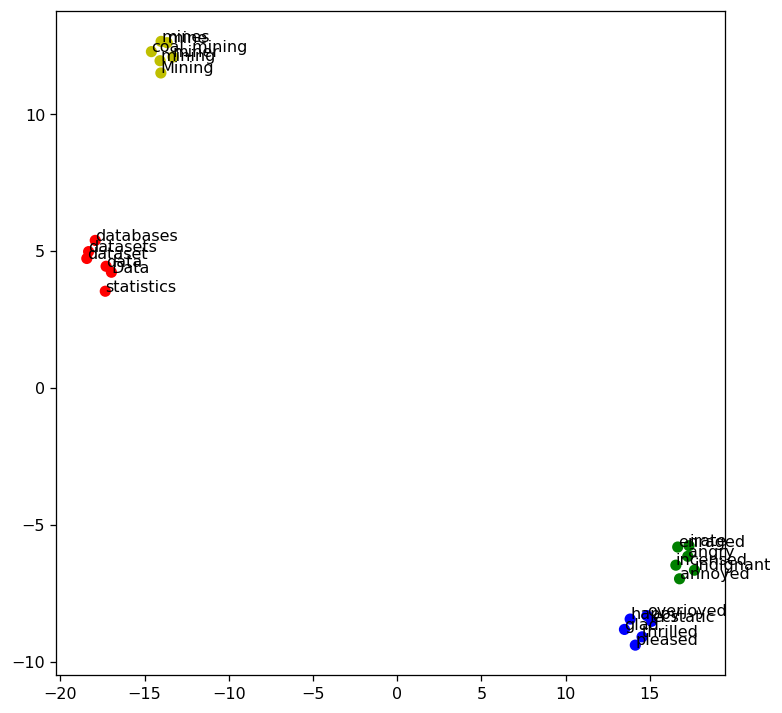

In [65]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

## w2v model
model = w2v_google_model

## prepare training word vectors
size = 200
target_size = len(target_words)
all_word = list(model.index_to_key)
word_train = target_words + all_word[:size]
X_train = model[word_train]

## t-SNE model
tsne = TSNE(n_components=2, metric='cosine', random_state=28)

## training
X_tsne = tsne.fit_transform(X_train)

## plot the result
plt.figure(figsize=(7.5, 7.5), dpi=115)
plt.scatter(X_tsne[:target_size, 0], X_tsne[:target_size, 1], c=color)
for label, x, y in zip(target_words, X_tsne[:target_size, 0], X_tsne[:target_size, 1]):
    plt.annotate(label, xy=(x,y), xytext=(0,0),  textcoords='offset points')
plt.show()

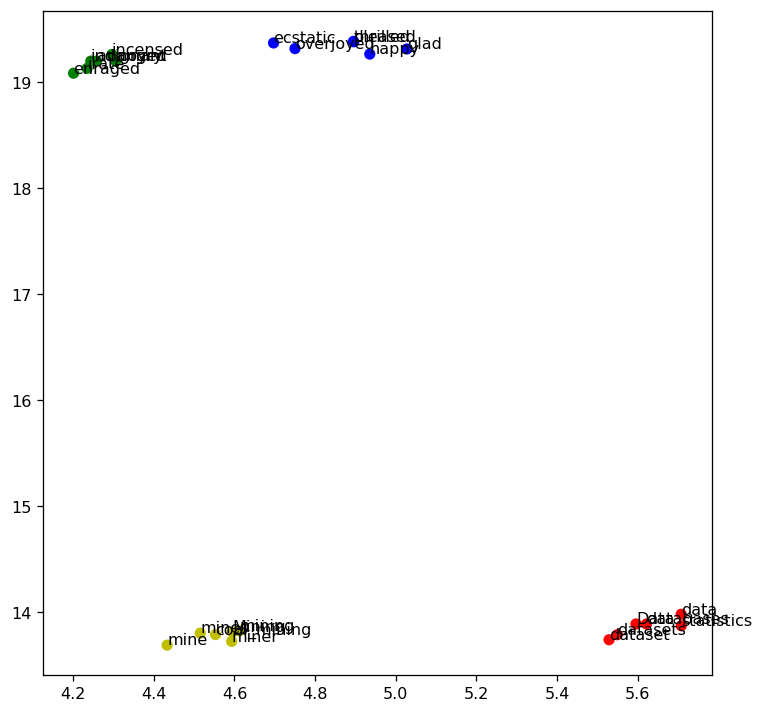

In [66]:
import matplotlib.pyplot as plt
import umap.umap_ as umap

## w2v model
model = w2v_google_model

## prepare training word vectors
size = 200
target_size = len(target_words)
all_word = list(model.index_to_key)
word_train = target_words + all_word[:size]
X_train = model[word_train]

## UMAP model
umap_model = umap.UMAP(n_components=2, metric='cosine', random_state=28)

## training
X_umap = umap_model.fit_transform(X_train)

## plot the result
plt.figure(figsize=(7.5, 7.5), dpi=115)
plt.scatter(X_umap[:target_size, 0], X_umap[:target_size, 1], c=color)
for label, x, y in zip(target_words, X_umap[:target_size, 0], X_umap[:target_size, 1]):
    plt.annotate(label, xy=(x,y), xytext=(0,0),  textcoords='offset points')
plt.show()


---
##### <a id='toc1_13_2_1_1_'></a>[**>>> Exercise 8 (Take home):**](#toc0_)

Generate a t-SNE and UMAP visualization to show the 15 words most related to the words "angry", "happy", "sad", "fear" (60 words total). Compare the differences between both graphs.

angry_words: ['angry', 'irate', 'enraged', 'indignant', 'incensed', 'annoyed', 'agitated', 'frustrated', 'furious', 'unhappy', 'outraged', 'livid', 'irritated', 'exasperated', 'angrier', 'Angry']
happy_words: ['happy', 'glad', 'pleased', 'ecstatic', 'overjoyed', 'thrilled', 'satisfied', 'proud', 'delighted', 'disappointed', 'excited', 'happier', 'Said_Hirschbeck', 'elated', 'thankful', 'unhappy']
sad_words: ['sad', 'saddening', 'Sad', 'saddened', 'heartbreaking', 'disheartening', 'Meny_Friedman', 'parishioner_Pat_Patello', 'saddens_me', 'distressing', 'reminders_bobbing', 'Turkoman_Shiites', 'saddest', 'unfortunate', 'sorry', 'bittersweet']
fear_words: ['fear', 'fearful', 'fears', 'Fear', 'fearing', 'worry', 'dread', 'feared', 'anxiety', 'apprehension', 'afraid', 'worries', 'concern', 'distrust', 'worried', 'Fearful']

target words: 
['angry', 'irate', 'enraged', 'indignant', 'incensed', 'annoyed', 'agitated', 'frustrated', 'furious', 'unhappy', 'outraged', 'livid', 'irritated', 'exasp

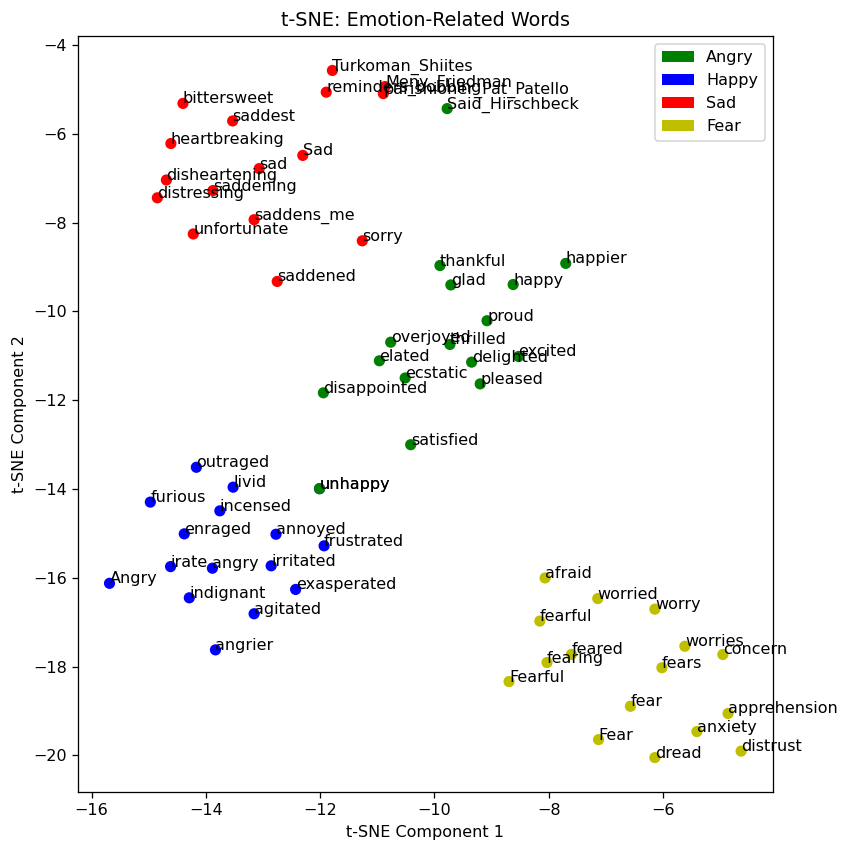

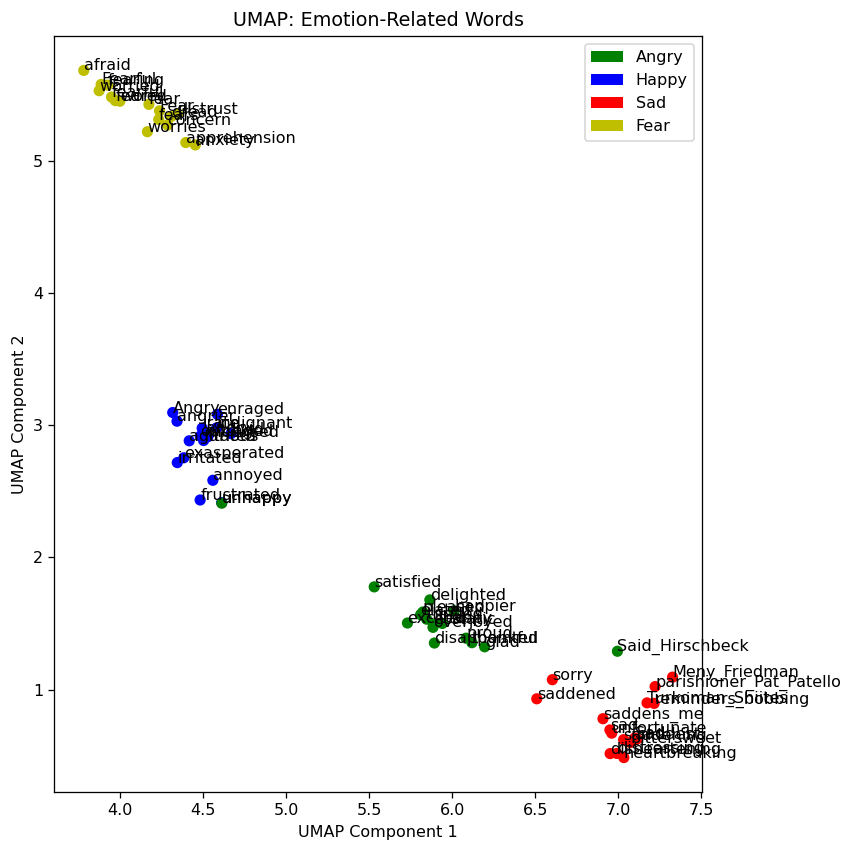

In [67]:
# Answer here
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import umap.umap_ as umap

# Top 15 words
topn = 15
angry_words = ['angry'] + [word_ for word_, sim_ in w2v_google_model.most_similar('angry', topn=topn)]
happy_words = ['happy'] + [word_ for word_, sim_ in w2v_google_model.most_similar('happy', topn=topn)]
sad_words = ['sad'] + [word_ for word_, sim_ in w2v_google_model.most_similar('sad', topn=topn)]
fear_words = ['fear'] + [word_ for word_, sim_ in w2v_google_model.most_similar('fear', topn=topn)]

print('angry_words:', angry_words)
print('happy_words:', happy_words)
print('sad_words:', sad_words)
print('fear_words:', fear_words)

target_words_emotions = angry_words + happy_words + sad_words + fear_words
print('\ntarget words: ')
print(target_words_emotions)

print('\ncolor list:')
cn = topn + 1
color = ['b'] * cn + ['g'] * cn + ['r'] * cn + ['y'] * cn
print(color)

# Prepare training word vectors
model = w2v_google_model
size = 200
target_size = len(target_words_emotions)
all_word = list(model.index_to_key)
word_train = target_words_emotions + all_word[:size]
X_train = model[word_train]

# Define legend chart
from matplotlib.patches import Patch
legend = [Patch(facecolor='g', label='Angry'),
                   Patch(facecolor='b', label='Happy'),
                   Patch(facecolor='r', label='Sad'),
                   Patch(facecolor='y', label='Fear')]

# t-SNE
tsne_emotions = TSNE(n_components=2, metric='cosine', random_state=28)
X_tsne_emotions = tsne_emotions.fit_transform(X_train)

plt.figure(figsize=(7.5, 7.5), dpi=115)
plt.scatter(X_tsne_emotions[:target_size, 0], X_tsne_emotions[:target_size, 1], c=color)
for label, x, y in zip(target_words_emotions, X_tsne_emotions[:target_size, 0], X_tsne_emotions[:target_size, 1]):
    plt.annotate(label, xy=(x, y), xytext=(0, 0), textcoords='offset points')
plt.title('t-SNE: Emotion-Related Words')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.legend(handles=legend, loc='upper right')
plt.tight_layout()
plt.show()

# UMAP
umap_emotions = umap.UMAP(n_components=2, metric='cosine', random_state=28)
X_umap_emotions = umap_emotions.fit_transform(X_train)

plt.figure(figsize=(7.5, 7.5), dpi=115)
plt.scatter(X_umap_emotions[:target_size, 0], X_umap_emotions[:target_size, 1], c=color)
for label, x, y in zip(target_words_emotions, X_umap_emotions[:target_size, 0], X_umap_emotions[:target_size, 1]):
    plt.annotate(label, xy=(x, y), xytext=(0, 0), textcoords='offset points')
plt.title('UMAP: Emotion-Related Words')
plt.xlabel('UMAP Component 1')
plt.ylabel('UMAP Component 2')
plt.legend(handles=legend, loc='upper right')
plt.tight_layout()
plt.show()

**Compare the differences between both graphs**

1. T-SNE figure creates more separated clusters, while UMAP figure is more tighter.

2. T-SNE tends to explore local structure rather than global structure.

3. UMAP shows the accurate position relative to each cluster, so the distance between clusters reflects the actual relationships.

---